In [29]:
# starter libraries & functions
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
# this is to maintain same plot look
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use('fivethirtyeight')
%matplotlib inline

# file path & files
data_path = 'C:/Users/cmontevirgen/class_projects/nflstatistics/'  
rb_career = pd.read_csv(data_path + 'Career_Stats_Rushing.csv')
rb_games = pd.read_csv(data_path + 'Game_Logs_Runningback.csv')
basic_stats = pd.read_csv(data_path + 'Basic_Stats.csv')


In [30]:
# examine columns names
print(basic_stats.columns)
print(rb_games.columns)

Index(['Age', 'Birth Place', 'Birthday', 'College', 'Current Status',
       'Current Team', 'Experience', 'Height (inches)', 'High School',
       'High School Location', 'Name', 'Number', 'Player Id', 'Position',
       'Weight (lbs)', 'Years Played'],
      dtype='object')
Index(['Player Id', 'Name', 'Position', 'Year', 'Season', 'Week', 'Game Date',
       'Home or Away', 'Opponent', 'Outcome', 'Score', 'Games Played',
       'Games Started', 'Rushing Attempts', 'Rushing Yards', 'Yards Per Carry',
       'Longest Rushing Run', 'Rushing TDs', 'Receptions', 'Receiving Yards',
       'Yards Per Reception', 'Longest Reception', 'Receiving TDs', 'Fumbles',
       'Fumbles Lost'],
      dtype='object')


In [31]:
# remove spaces in column names
basic_stats.rename(columns={'Birth Place':'Birth_Place', 'Current Status':'Current_Status', 
                           'Current Team': 'Current_Team', 'Height (inches)': 'Height',
                           'High School':'High_School', 'High School Location':'High_School_Location',
                           'Player Id':'Player_Id', 'Weight (lbs)':'Weight', 'Years Played':'Years_Played'}, inplace=True)
rb_games.rename(columns = {'Player Id':'Player_Id', 'Game Date':'Game_Date', 
                           'Home or Away': 'Home_Away', 'Games Played': 'Games_Played',
                           'Games Started':'Games_Started', 'Rushing Attempts':'Rushing_Attempts',
                           'Rushing Yards':'Rushing_Yards', 'Yards Per Carry':'YPC', 'Longest Rushing Run':'Longest_Rush',
                          'Rushing TDs': 'Rushing_TDs', 'Receiving Yards':'Receiving_Yards', 'Yards Per Reception':'YPR',
                          'Longest Reception':'Longest_Reception','Receiving TDs':'Receiving_TDs',
                          'Fumbles Lost':'Fumbles_Lost'}, inplace=True)

In [32]:
# check new column names
rb_games.columns

Index(['Player_Id', 'Name', 'Position', 'Year', 'Season', 'Week', 'Game_Date',
       'Home_Away', 'Opponent', 'Outcome', 'Score', 'Games_Played',
       'Games_Started', 'Rushing_Attempts', 'Rushing_Yards', 'YPC',
       'Longest_Rush', 'Rushing_TDs', 'Receptions', 'Receiving_Yards', 'YPR',
       'Longest_Reception', 'Receiving_TDs', 'Fumbles', 'Fumbles_Lost'],
      dtype='object')

In [33]:
rb_games.head()

,Player_Id,Name,Position,Year,Season,Week,Game_Date,Home_Away,Opponent,Outcome,...,YPC,Longest_Rush,Rushing_TDs,Receptions,Receiving_Yards,YPR,Longest_Reception,Receiving_TDs,Fumbles,Fumbles_Lost
0,bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,7,10/20,Away,ATL,L,...,--,--,--,--,--,--,--,--,--,--
1,bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,8,10/27,Home,NYG,L,...,--,--,--,--,--,--,--,--,--,--
2,bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,9,11/03,Away,RAM,L,...,--,--,--,3,27,9.0,10,0,--,--
3,bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,10,11/10,Home,SEA,L,...,--,--,--,--,--,--,--,--,--,--
4,bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,11,11/17,Away,GB,L,...,1.0,1,0,--,--,--,--,--,--,--


In [34]:
# Note to Adam: In this section, I admitedly opened the csv file and looked because I couldn't find a quick way
# to see all of the potential data errors.

# replaced '--' values with 0
rb_games.replace('--',0, inplace = True)

In [35]:
# Convert data to numbers
# First, there were string in dat, so I removed them
rb_games['Longest_Rush'] = rb_games['Longest_Rush'].str.rstrip('T')
rb_games['Longest_Reception'] = rb_games['Longest_Reception'].str.rstrip('T')

# Change to intergers and floats
rb_games['Rushing_Attempts'] = rb_games.Rushing_Attempts.astype(int)
rb_games['Games_Played'] = rb_games.Games_Played.astype(int)
rb_games['Rushing_Yards'] = rb_games.Rushing_Yards.astype(int)
rb_games['YPC'] = rb_games.YPC.astype(float)
rb_games['Longest_Rush'] = rb_games.Longest_Rush.astype(float)
rb_games['Rushing_TDs'] = rb_games.Rushing_TDs.astype(int)
rb_games['Receptions'] = rb_games.Receptions.astype(int)
rb_games['Receiving_Yards'] = rb_games.Receiving_Yards.astype(int)
rb_games['YPR'] = rb_games.YPR.astype(float)
rb_games['Longest_Reception'] = rb_games.Longest_Reception.astype(float)
rb_games['Receiving_TDs'] = rb_games.Receiving_TDs.astype(int)
rb_games['Fumbles'] = rb_games.Fumbles.astype(int)
rb_games['Fumbles_Lost'] = rb_games.Fumbles_Lost.astype(int)
rb_games['Games_Started'] = rb_games.Games_Started.astype(int)

In [36]:
rb_games.dtypes

Player_Id             object
Name                  object
Position              object
Year                   int64
Season                object
Week                   int64
Game_Date             object
Home_Away             object
Opponent              object
Outcome               object
Score                 object
Games_Played           int32
Games_Started          int32
Rushing_Attempts       int32
Rushing_Yards          int32
YPC                  float64
Longest_Rush         float64
Rushing_TDs            int32
Receptions             int32
Receiving_Yards        int32
YPR                  float64
Longest_Reception    float64
Receiving_TDs          int32
Fumbles                int32
Fumbles_Lost           int32
dtype: object

In [37]:
# Merge both files and get more information per player. Set Player ID as index
merged_rb = pd.merge(rb_games, basic_stats, on = 'Player_Id')

In [38]:
# Replace missing numbers with 0
merged_rb.fillna(0)
# Although fillna above got most, NaN remains. I used an average for replacement values
merged_rb.Weight.replace(0,merged_rb.Weight.mean(), inplace = True)
merged_rb.Weight.fillna(merged_rb.Weight.mean(), inplace=True)
merged_rb.Height.fillna(merged_rb.Height.mean(), inplace=True)

In [39]:
# Check for NaN values
merged_rb.isnull().sum()

Player_Id                   0
Name_x                      0
Position_x              56035
Year                        0
Season                      0
Week                        0
Game_Date                   0
Home_Away                   0
Opponent                    0
Outcome                     0
Score                       0
Games_Played                0
Games_Started               0
Rushing_Attempts            0
Rushing_Yards               0
YPC                         0
Longest_Rush            31052
Rushing_TDs                 0
Receptions                  0
Receiving_Yards             0
YPR                         0
Longest_Reception       39430
Receiving_TDs               0
Fumbles                     0
Fumbles_Lost                0
Age                      2946
Birth_Place               575
Birthday                    2
College                     2
Current_Status              0
Current_Team            56035
Experience                  2
Height                      0
High_Schoo

                    Weight    Height       YPC  Receptions  Receiving_Yards  \
Weight            1.000000  0.486899 -0.102030   -0.099701        -0.109578   
Height            0.486899  1.000000 -0.043100   -0.015835        -0.016995   
YPC              -0.102030 -0.043100  1.000000    0.291937         0.251498   
Receptions       -0.099701 -0.015835  0.291937    1.000000         0.850901   
Receiving_Yards  -0.109578 -0.016995  0.251498    0.850901         1.000000   
Week             -0.000876 -0.001114  0.000886    0.027444         0.022528   
Games_Played     -0.030326  0.029882  0.282097    0.237393         0.200075   
Rushing_Attempts -0.069808  0.030657  0.446856    0.424457         0.356952   

                      Week  Games_Played  Rushing_Attempts  
Weight           -0.000876     -0.030326         -0.069808  
Height           -0.001114      0.029882          0.030657  
YPC               0.000886      0.282097          0.446856  
Receptions        0.027444      0.237393    

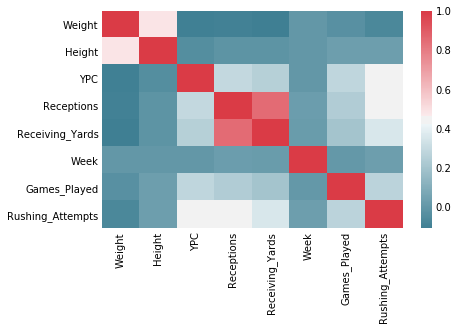

In [41]:
# Now, I'll start looking into relationships between variables

# I'm trying to find the best variables to forecast Yards Per Carry (YPC). There's not much here that isn't too obvious. 
# However, there's an interesting relationship between Receptions and YPC
correlations = merged_rb[['Weight', 'Height', 'YPC','Receptions','Receiving_Yards','Week', 'Games_Played','Rushing_Attempts']].corr()
print(correlations)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print(sns.heatmap(correlations, cmap=cmap))

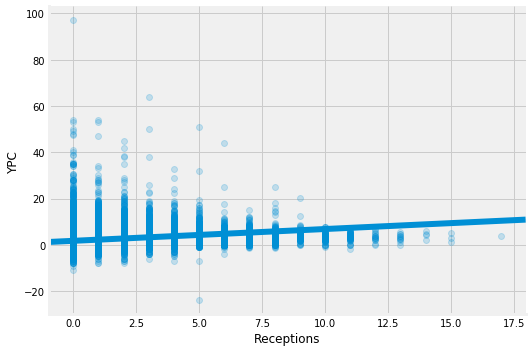

In [45]:
# Scatter plot of the Receptions & YPC
sns.lmplot(x='Receptions', y='YPC', data=merged_rb, aspect=1.5, scatter_kws={'alpha':0.2});

C:\Users\cmontevirgen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


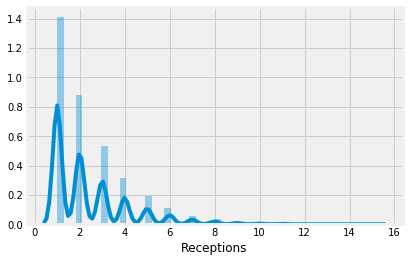

In [47]:
# Receiving Yards skews towards 0, makes sense
filtered_receptions = merged_rb[(merged_rb.Receptions > 0) & (merged_rb.Receptions < 17)]
sns.distplot(filtered_receptions.Receptions) # see if receptions are normally distributed

C:\Users\cmontevirgen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


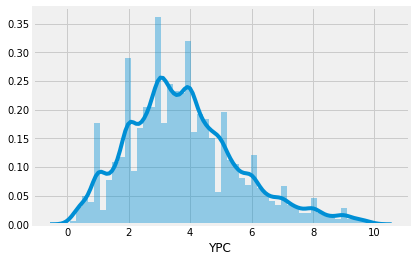

In [33]:
# YPC skews a little left because of its long tail
#filtered_YPC = merged_rb[(merged_rb.YPC > 0) & (merged_rb.YPC < 10)]
filtered_YPC = merged_rb[(merged_rb.YPC > 0.0) & (merged_rb.YPC < 10.0)]
#filtered_YPC.head()
#sns.distplot(filtered_YPC)
sns.distplot(filtered_YPC.YPC) # see if YPC is normally distributed

C:\Users\cmontevirgen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cmontevirgen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


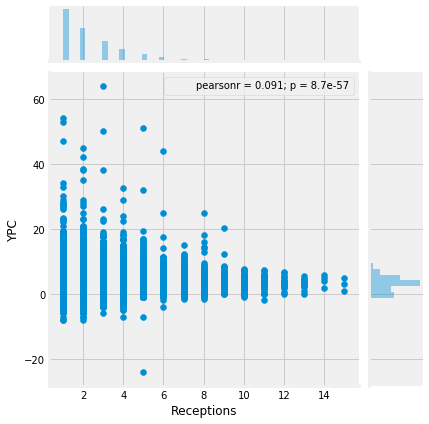

In [50]:
sns.jointplot(x=filtered_receptions.Receptions, y=filtered_receptions.YPC); #Receptions & YPC

C:\Users\cmontevirgen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cmontevirgen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


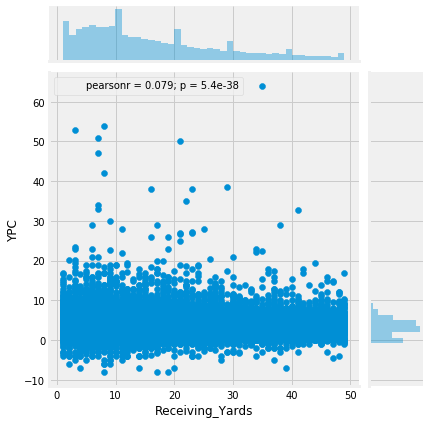

In [85]:
sns.jointplot(x=filtered_rec_yards.Receiving_Yards, y=filtered_rec_yards.YPC); #Receiving yards & YPC

In [36]:
# Show ranges. AS an aside, a running back with a YPC> 5.0 is deemed elite
print('Smallest: {}  YPC'.format(filtered_YPC['YPC'].min())) 
print('Largest: {}  YPC'.format(filtered_YPC['YPC'].max()))

Smallest: 0.1  YPC
Largest: 9.9  YPC


In [86]:
# Show rangesof receptions
print('Smallest: {}  # Receptions'.format(filtered_YPC['Receptions'].min())) 
print('Largest: {}  # Receptions'.format(filtered_YPC['Receptions'].max()))

Smallest: 0  # Receptions
Largest: 17  # Receptions


In [82]:
# shows that if a RB is used a receiver with receiving yards more than 30 yards, that RB has a higher YPC
mean_YPC = filtered_YPC[filtered_YPC.Receiving_Yards == 0].YPC.mean()
mean_YPCB = filtered_YPC[filtered_YPC.Receiving_Yards> 30].YPC.mean()
print(mean_YPC)
print(mean_YPCB)

3.6775601926163994
3.952756039469167


In [63]:
# shows that if a RB catches more than 15 passes a game, that RB has a higher YPC
mean_YPC = filtered_YPC[filtered_YPC.Receptions == 0].YPC.mean()
mean_YPCB = filtered_YPC[filtered_YPC.Receptions> 15].YPC.mean()
print(mean_YPC)
print(mean_YPCB)

3.6726215993405
4.0


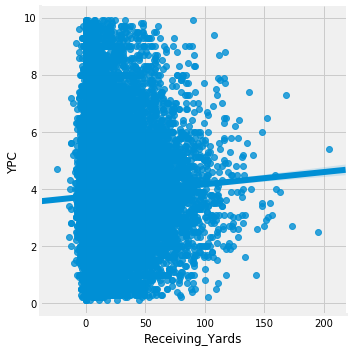

In [83]:
sns.lmplot(x="Receiving_Yards", y='YPC', data=filtered_YPC);

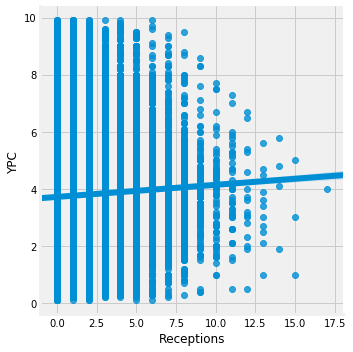

In [84]:
sns.lmplot(x="Receptions", y='YPC', data=filtered_YPC);

In [ ]:
#Insights. The relationships aren't very strong between YPC and other variables. The one that stood out to me is the
#relationships between rushing and receiving, which is not the main job of a running back. It seems like the more a 
#running back catches the ball, commonly referred to as a "catch-passing back", the more effective he will be as a rusher.

# I will look into transforming the data or even creating cumulative metrics, which might provide more meaningful insight.

In [51]:
# I want to model a couple of things, 1) use KNN to predict "elite" running bakcs, as measured by running backs with YPC> 5.0
# 2) use linear or other models to predict YPC, based on receptions or other variables
# Hypothesis - Elite running back performance (YPC> 5) is a function of opportunity (Rushing Attempts), Receptions, and 
#... and experience (i still need to work on this, but I'm thinking cumulative Rushing_Attempts throughout a career?)